## <a id='toc1_1_'></a>[Table of Contents](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Table of Contents](#toc1_1_)    
  - [Setup](#toc1_2_)    
  - [Question 1](#toc1_3_)    
    - [a)	Given a list of identifiers:](#toc1_3_1_)    
      - [i.	Write a function to return the array with duplicates removed](#toc1_3_1_1_)    
      - [ii.	Write a function to return an array of all the duplicate entries from the input array](#toc1_3_1_2_)    
    - [b)	Write a function that takes as input integers N and L to generate N million random DNA fragments of length L](#toc1_3_2_)    
    - [c)	Write a function which expects as its input a dictionary with names as the keys and ages as the values. The function should return an array of age averages for people aged 10-20, 20-30, and over 30](#toc1_3_3_)    
  - [Question 2](#toc1_4_)    
    - [a)	The data in the CSVs provided can be linked using the “individual_id” column](#toc1_4_1_)    
      - [i.	How would you combine the two tables in a way that retains ALL individuals?](#toc1_4_1_1_)    
      - [ii.	How would you change this code to only retain individuals in demo_data_age.csv?](#toc1_4_1_2_)    
    - [b)	How would you generate a bar plot showing the age and sex breakdown of individuals in the table generated in part ii of question 2a?](#toc1_4_2_)    
  - [Question 3](#toc1_5_)    
    - [Count the number of variant positions in the VCF](#toc1_5_1_)    
    - [There are potential SNPs of interest at positions 42, 1234 and 1984. Extract the lines containing these positions into a new file called: variants_of_interest.vcf](#toc1_5_2_)    
    - [A typo has resulted in a false chromosome name bact_chrom1_ where it should be bact_chrom1, remove the additional _ for every entry in isolate_of_interest.vcf](#toc1_5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Setup](#toc0_)

In [2]:
# Required pip packages
!pip install pandas seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from collections.abc import Iterable
from functools import reduce
from statistics import mean
from typing import Dict, List, Any
import doctest
import random
import string
import warnings

# External libraries
import pandas as pd
import seaborn as sns

In [4]:
# Copy the assesment files from downloads folder
!cp /mnt/c/Users/npmpm/Downloads/{demo_data*,*.vcf} .

# Verify all files present in current working directory
!ls

demo_data_age.csv  demo_data_sex.csv  isolate_of_interest.vcf  submission.ipynb


## <a id='toc1_3_'></a>[Question 1](#toc0_)

### <a id='toc1_3_1_'></a>[a)	Given a list of identifiers:](#toc0_)

#### <a id='toc1_3_1_1_'></a>[i.	Write a function to return the array with duplicates removed](#toc0_)

In [5]:
# Split into a list of words seperated by space
lst = "A priest priest and rabbi walked into the bar".split()


# Answer:
# Iterative approach
def drop_dupes_it(lst: List[Any]) -> List[Any]:
    """Remove duplicates from a list using reduce
    Iteratively goes through each item in `lst` and,
    adds them to temporary list `result` and returns it

    Args:
        lst (List[Any]): A list of identifiers

    Returns:
        List[Any]: The identifiers' list without duplicates

    Examples:

    Works with numbers
    >>> drop_dupes_it([1, 1, 2, 3])
    [1, 2, 3]

    Works with strings
    >>> drop_dupes_it(list("AACGTT"))
    ['A', 'C', 'G', 'T']

    Works with mixed values
    >>> drop_dupes_it(['A', 1, set(), set()])
    ['A', 1, set()]

    Works with null elements
    >>> drop_dupes_it([None, 1, None])
    [None, 1]

    Works with non-iterables
    >>> drop_dupes_it(None)

    >>> drop_dupes_it(1)
    1

    """
    return (
        reduce(
            lambda result, element: result + [element]
            if element not in result
            else result,
            lst,
            [],  # initial value
        )
        # Only work on the parameter if they are itereable
        if isinstance(lst, Iterable)
        # Return None instead of exception
        else lst
    )  # or raise Exception("Parameter not a list")


# Pythonic approach
def drop_dupes_py(lst: List[Any]) -> List[Any]:
    """Remove duplicates from a list using a pythonic approach
    Converts the list to a ordered set (Python >3.7 only) and back to `list`
    to only keep unique values.
    Not as robust as `drop_dupes_it` but works for most usecases.

    Args:
        lst (List[Any]): A list of identifiers

    Returns:
        List[Any]: The identifier list without duplicates

        Examples:

    Works with numbers
    >>> drop_dupes_py([1, 1, 2, 3])
    [1, 2, 3]

    Works with strings
    >>> drop_dupes_py(list("AACGTT"))
    ['A', 'C', 'G', 'T']

    Works with null elements
    >>> drop_dupes_py([None, 1, None])
    [None, 1]
    """

    return list(dict.fromkeys(lst))

In [6]:
print(drop_dupes_it(lst))
print(drop_dupes_py(lst))

['A', 'priest', 'and', 'rabbi', 'walked', 'into', 'the', 'bar']
['A', 'priest', 'and', 'rabbi', 'walked', 'into', 'the', 'bar']


#### <a id='toc1_3_1_2_'></a>[ii.	Write a function to return an array of all the duplicate entries from the input array](#toc0_)

In [7]:
def duplicates(lst: List[Any]) -> List[Any]:
    """Get all duplicates entries from a list

    Args:
        lst (List[Any]): A list of identifiers

    Returns:
        List[Any]: Only duplicate entries from identifiers' list

    Examples:

    Works with numbers
    >>> duplicates([1, 1, 2, 3])
    [1, 1]

    Works with strings
    >>> duplicates(list("AACGTT"))
    ['A', 'A', 'T', 'T']

    Works with mixed values
    >>> duplicates(['A', 1, set(), set()])
    [set(), set()]

    Works with null elements
    >>> duplicates([None, 1, None])
    [None, None]

    Works with non-iterables
    >>> duplicates(None)

    >>> duplicates(1)

    """
    # Use a list comprehension for elements in the list if their count is greater than 1
    return (
        [item for item in lst if lst.count(item) > 1]
        if isinstance(lst, Iterable) # Only work on iterables
        else None
    )


In [8]:
print(duplicates(lst))

['priest', 'priest']


### <a id='toc1_3_2_'></a>[b)	Write a function that takes as input integers N and L to generate N million random DNA fragments of length L](#toc0_)

In [9]:
def fragments(N: int, L: int) -> map:
    """Create N million DNA fragments of L-length
    Returns a map, requires converting into list() or using next() to iterate through all sequences

    Args:
        N (int): Number of million fragments
        L (int): Length of each fragment

    Returns:
        map: Return a map iterable to save memory space

    Examples:

    Getting a single sequence using next
    >>> random.seed(42)
    >>> next(fragments(N = 1, L =10))
    'AAGCCCAATA'

    Getting all fragments using list
    >>> random.seed(42)
    >>> len(list(fragments(N=2, L=10)))
    2000000
    """

    def rand(_) -> str:
        """Create a single dna fragment of length L
        A local function of fragments

        Args:
            _ : Unused placeholder argument to make proceeding map cleaner i.e. rand instead of lambda x: rand()

        Returns:
            str: A DNA fragment of length L

        Examples:

        >>> rand() # L = 10
        'ATGGATGGAA'

        """
        return "".join(random.choice("ACGT") for _ in range(L))

    return map(rand, range(N * 10**6))


In [10]:
print(fragments(10, 100))
print(next(fragments(10, 10)))
print(len(list(fragments(1, 1))))

GGTGTGTAGT
1000000


In [11]:
# Time required for base case of 1 million fragments of length 1
%timeit list(fragments(1, 1))

795 ms ± 9.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### <a id='toc1_3_3_'></a>[c)	Write a function which expects as its input a dictionary with names as the keys and ages as the values. The function should return an array of age averages for people aged 10-20, 20-30, and over 30](#toc0_)

In [12]:
hash = {x: y for x, y in zip(string.ascii_letters, range(40))}


def histogram(
    data: Dict[str, int] = hash, start: int = 10, stop: int = 30, step: int = 10
) -> List[int]:
    """Split dictionary into bins and calculate the mean for each bin
    over the half-close range (lower value exluded, upper value included)

    Args:
        data (Dict[str, int], optional): A dictionary with integers as values.
        start (int, optional): Start of the bin range. Defaults to 10.
        stop (int, optional): Stop of the bin range. Defaults to 30.
        step (int, optional): Step size of the bin range. Defaults to 10.

    Returns:
        List[int]: A list containing the mean average for each bin

    Examples:

    Works with integers and defaults
    >>> histogram({x: y for x, y in zip(string.ascii_letters, range(40))})
    [15.5, 25.5, 35]

    Works with different range
    >>> histogram(data = {x: y for x, y in zip(string.ascii_letters, range(40))}, start = 0, stop = 30, step = 10)
    [5.5, 15.5, 25.5, 35]

    Works with odd step size
    >>> histogram(data = {x: y for x, y in zip(string.ascii_letters, range(40))}, start = 0, stop = 30, step = 11)
    [6, 17, 31]

    Gracefully handles out of bound exceptions
    >>> histogram(data = {x: y for x, y in zip(string.ascii_letters, range(40))}, start = 0, stop = 40, step = 10)
    [5.5, 15.5, 25.5, 35, 0]

    """
    return [
        # Use a list comprehension to get all ages between range lower and upper
        # Calculate mean using the statistics stdlib
        # Return mean as 0 for out-of-index ranges
        mean(
            [age for age in hash.values() if age > lower and age <= upper]
            or [0]
        )
        # Create a tuple containing lower and upper range of each bin
        # Convert into list for appending the last item
        for lower, upper in list(
            zip(
                range(start, stop, step),
                # Include the last number as well by adding 1
                range(start + step, stop + 1, step),
            )
        )
        # Add the last range from stop to infinity
        # Add logic for odd step size
        + [(stop - stop % step, float("inf"))]
    ]


In [13]:
histogram(hash)

[15.5, 25.5, 35]

In [14]:
doctest.testmod(verbose=True)

Trying:
    drop_dupes_it([1, 1, 2, 3])
Expecting:
    [1, 2, 3]
ok
Trying:
    drop_dupes_it(list("AACGTT"))
Expecting:
    ['A', 'C', 'G', 'T']
ok
Trying:
    drop_dupes_it(['A', 1, set(), set()])
Expecting:
    ['A', 1, set()]
ok
Trying:
    drop_dupes_it([None, 1, None])
Expecting:
    [None, 1]
ok
Trying:
    drop_dupes_it(None)
Expecting nothing
ok
Trying:
    drop_dupes_it(1)
Expecting:
    1
ok
Trying:
    drop_dupes_py([1, 1, 2, 3])
Expecting:
    [1, 2, 3]
ok
Trying:
    drop_dupes_py(list("AACGTT"))
Expecting:
    ['A', 'C', 'G', 'T']
ok
Trying:
    drop_dupes_py([None, 1, None])
Expecting:
    [None, 1]
ok
Trying:
    duplicates([1, 1, 2, 3])
Expecting:
    [1, 1]
ok
Trying:
    duplicates(list("AACGTT"))
Expecting:
    ['A', 'A', 'T', 'T']
ok
Trying:
    duplicates(['A', 1, set(), set()])
Expecting:
    [set(), set()]
ok
Trying:
    duplicates([None, 1, None])
Expecting:
    [None, None]
ok
Trying:
    duplicates(None)
Expecting nothing
ok
Trying:
    duplicates(1)
Expecti

TestResults(failed=0, attempted=23)

## <a id='toc1_4_'></a>[Question 2](#toc0_)
For this section, use the provided files demo_data_age.csv and demo_data_sex.csv and answer with R or Python.  Please indicate any libraries or packages you would need for the answers you give.

### <a id='toc1_4_1_'></a>[a)	The data in the CSVs provided can be linked using the “individual_id” column](#toc0_)

In [15]:
# Setup
# Read csv files into pandas dataframe
age = pd.read_csv('./demo_data_age.csv')
sex = pd.read_csv('./demo_data_sex.csv')


In [16]:
# Print the first 5 rows of age
age.head()

,individual_id,age
0,PT1801001,89.0
1,PT1801002,57.0
2,PT1801003,17.0
3,PT1801004,41.0
4,PT1801005,34.0


In [17]:
# Print the first 5 rows of sex
sex.head()

,individual_id,sex
0,PT1801001,male
1,PT1801002,female
2,PT1801003,female
3,PT1801004,female
4,PT1801005,male


#### <a id='toc1_4_1_1_'></a>[i.	How would you combine the two tables in a way that retains ALL individuals?](#toc0_)

In [18]:
# An outer join produces a result with primary keys from both tables
outer = pd.merge(age, sex, how='outer', on='individual_id')

In [19]:
# Get the first 5 columns
outer.head()

,individual_id,age,sex
0,PT1801001,89.0,male
1,PT1801002,57.0,female
2,PT1801003,17.0,female
3,PT1801004,41.0,female
4,PT1801005,34.0,male


In [20]:
outer.shape

(305, 3)

#### <a id='toc1_4_1_2_'></a>[ii.	How would you change this code to only retain individuals in demo_data_age.csv?](#toc0_)

In [21]:
# A left join keeps only the keys from the age dataframe
left = pd.merge(age, sex, how='left', on='individual_id')

In [22]:
left.head()

,individual_id,age,sex
0,PT1801001,89.0,male
1,PT1801002,57.0,female
2,PT1801003,17.0,female
3,PT1801004,41.0,female
4,PT1801005,34.0,male


In [23]:
left.shape

(292, 3)

#### iii.	How would you replace any NA values in the data table with “unknown”?

In [24]:
# Filter the null values
outer[outer.isna().any(axis=1)]

,individual_id,age,sex
56,PT1803057,NaN,NaN
77,PT1803078,89.0,NaN
97,PT1805099,95.0,NaN
101,PT1805103,NaN,NaN
117,PT1805119,NaN,NaN
118,PT1805120,NaN,NaN
119,PT1805121,NaN,NaN
125,PT1805127,24.0,NaN
127,PT1805130,NaN,NaN
128,PT1805131,42.0,NaN


In [25]:
# Filter out the null values
clean = outer.fillna("unknown")

In [26]:
clean[outer.isna().any(axis=1)]

,individual_id,age,sex
56,PT1803057,unknown,unknown
77,PT1803078,89.0,unknown
97,PT1805099,95.0,unknown
101,PT1805103,unknown,unknown
117,PT1805119,unknown,unknown
118,PT1805120,unknown,unknown
119,PT1805121,unknown,unknown
125,PT1805127,24.0,unknown
127,PT1805130,unknown,unknown
128,PT1805131,42.0,unknown


### <a id='toc1_4_2_'></a>[b)	How would you generate a bar plot showing the age and sex breakdown of individuals in the table generated in part ii of question 2a?](#toc0_)

In [27]:
# Drop rows with null values
clean = left.dropna()
clean.shape

(278, 3)

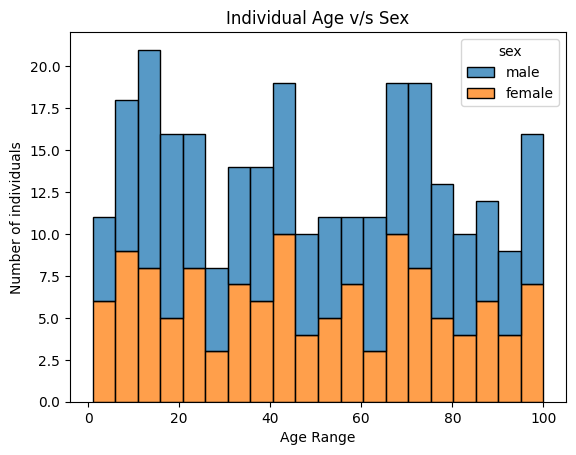

In [28]:
with warnings.catch_warnings():
    # Hide depreciation warning
    warnings.simplefilter('ignore')

    # Use an histplot as the number of individual is too large
    plt = sns.histplot(data=clean, x='age', hue='sex', multiple='stack', bins=20)
    # Set labels and title
    plt.set_xlabel('Age Range')
    plt.set_ylabel('Number of individuals')
    plt.set_title('Individual Age v/s Sex')


## <a id='toc1_5_'></a>[Question 3](#toc0_)
For this section, a VCF file has been provided called isolate_of_interest.vcf. If you are unfamiliar with VCF files, the following Wikipedia page explains the format Variant Call Format - Wikipedia. 

Please use Unix shell commands to answer the questions in this section.

In [29]:
# View the first 10 lines
!head -n 10 isolate_of_interest.vcf

##fileformat=VCFv4.1
##reference=ref.fasta
##PHEnix-Version=1-4-3
##coverageMetaData=<dev=35.76,mean=160.39>
##INFO=<ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
##INFO=<ID=AF,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
##INFO=<ID=AN,Number=1,Type=Integer,Description="Total number of alleles in called genotypes">
##INFO=<ID=BaseQRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt Vs. Ref base qualities">
##INFO=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth; some reads may have been filtered">
##INFO=<ID=DS,Number=0,Type=Flag,Description="Were any of the samples downsampled?">


### <a id='toc1_5_1_'></a>[Count the number of variant positions in the VCF](#toc0_)

In [30]:
# -E for enabling regex
# -c for counting lines
# ^[^#] matches all lines that don't start with #, used to exclude the headers
!grep -E -c '^[^#]' isolate_of_interest.vcf

474


### <a id='toc1_5_2_'></a>[There are potential SNPs of interest at positions 42, 1234 and 1984. Extract the lines containing these positions into a new file called: variants_of_interest.vcf](#toc0_)

In [31]:
# Use sed instead of grep as it wasn't capturing \t
# Use -E for extended regex
!sed -n -E '/\t(42|1234|1984)\t/p' isolate_of_interest.vcf |tee variants_of_interest.vcf

bact_chrom1_ 	42	.	G	.	215.23	mq_score:30	AN=2;DP=172;MQ=29.99;MQ0=106	GT:DP	0/0:172
bact_chrom1_ 	1234	.	T	.	215.23	mq_score:30	AN=2;DP=172;MQ=29.99;MQ0=106	GT:DP	0/0:172
bact_chrom1_ 	1984	.	C	.	215.23	mq_score:30	AN=2;DP=172;MQ=29.99;MQ0=106	GT:DP	0/0:172


### <a id='toc1_5_3_'></a>[A typo has resulted in a false chromosome name bact_chrom1_ where it should be bact_chrom1, remove the additional _ for every entry in isolate_of_interest.vcf](#toc0_)

In [32]:
# Perform simple substitution for dropping underscore
!sed 's/bact_chrom1_/bact_chrom1/g' isolate_of_interest.vcf |tee fixed.vcf

##fileformat=VCFv4.1
##reference=ref.fasta
##PHEnix-Version=1-4-3
##coverageMetaData=<dev=35.76,mean=160.39>
##INFO=<ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
##INFO=<ID=AF,Number=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
##INFO=<ID=AN,Number=1,Type=Integer,Description="Total number of alleles in called genotypes">
##INFO=<ID=BaseQRankSum,Number=1,Type=Float,Description="Z-score from Wilcoxon rank sum test of Alt Vs. Ref base qualities">
##INFO=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth; some reads may have been filtered">
##INFO=<ID=DS,Number=0,Type=Flag,Description="Were any of the samples downsampled?">
##INFO=<ID=Dels,Number=1,Type=Float,Description="Fraction of Reads Containing Spanning Deletions">
##INFO=<ID=FS,Number=1,Type=Float,Description="Phred-scaled p-value using Fisher's exact test to detect strand bias">
##INFO=<ID=Haplot